In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
Data = {'Country': ['USA','Canada','Germany','UK','France'],
        'GDP': [45000,42000,52000,49000,47000]}
  
df = pd.DataFrame(Data)
#df = pd.DataFrame(Data,columns=['Country','GDP_STATE'])

In [3]:
df.head()

,Country,GDP
0,USA,45000
1,Canada,42000
2,Germany,52000
3,UK,49000
4,France,47000


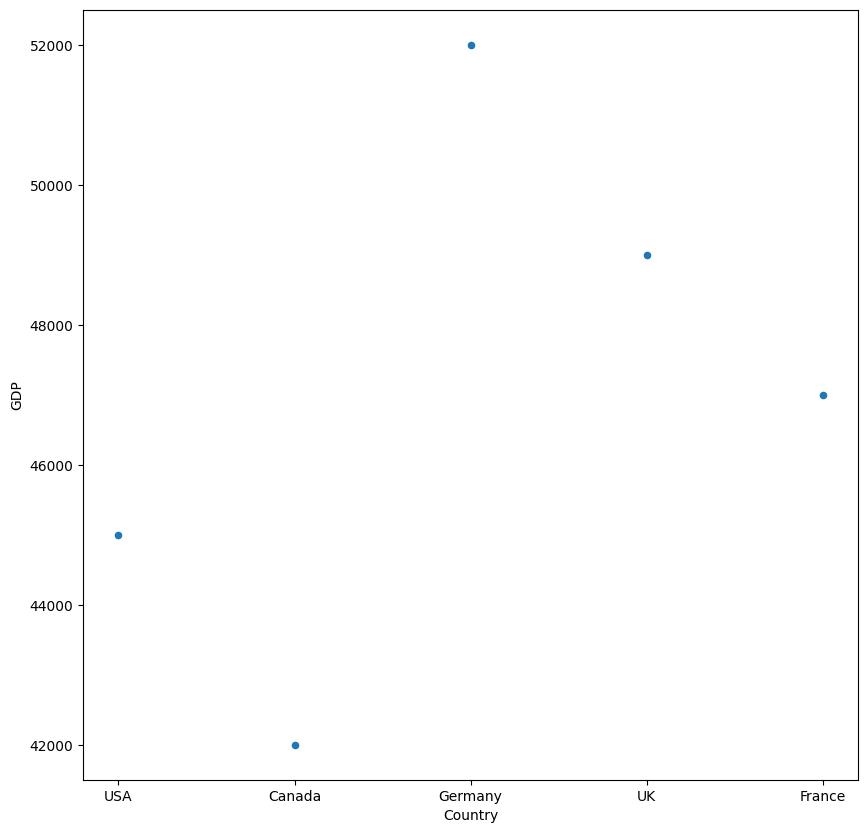

In [4]:
df.plot(x ='Country',y='GDP', figsize=(
    10, 10),
        kind = 'scatter');
#plt.show()

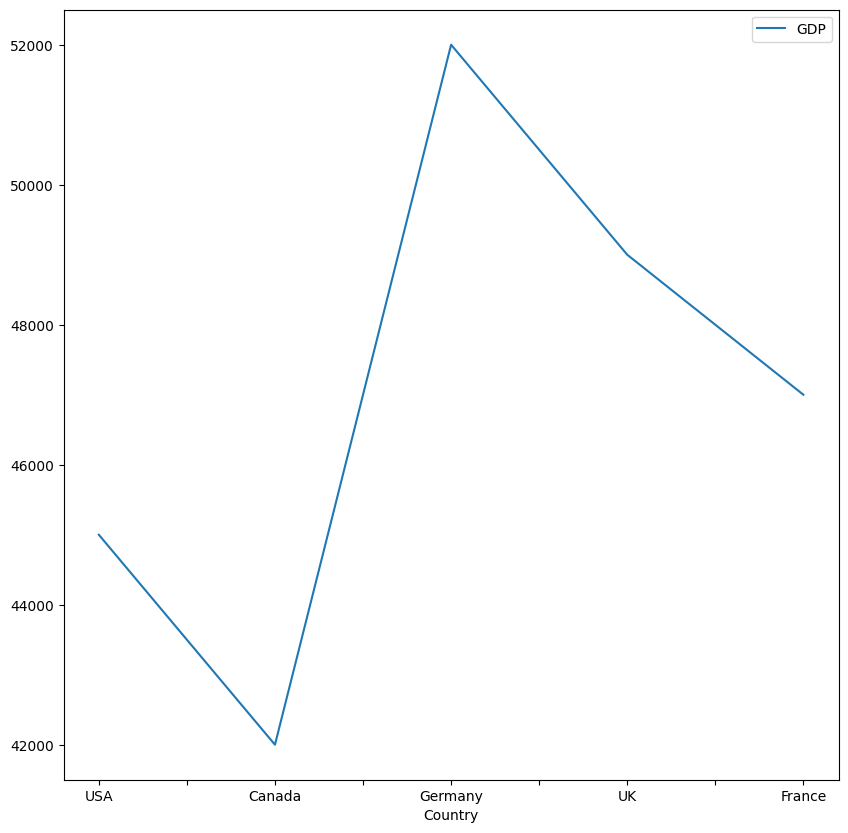

In [5]:
df.plot(x ='Country',y='GDP', figsize=(10, 10),
        kind = 'line');
#plt.show()

In [6]:
Data = {'Tasks': [300,500,700]}
df = pd.DataFrame(Data,columns=['Tasks'])

In [7]:
df.head()

,Tasks
0,300
1,500
2,700


In [8]:
df = pd.DataFrame(Data,columns=['Tasks'],
                  index = ['Tasks Pending','Tasks Ongoing','Tasks Completed'])
df.head()

,Tasks
Tasks Pending,300
Tasks Ongoing,500
Tasks Completed,700


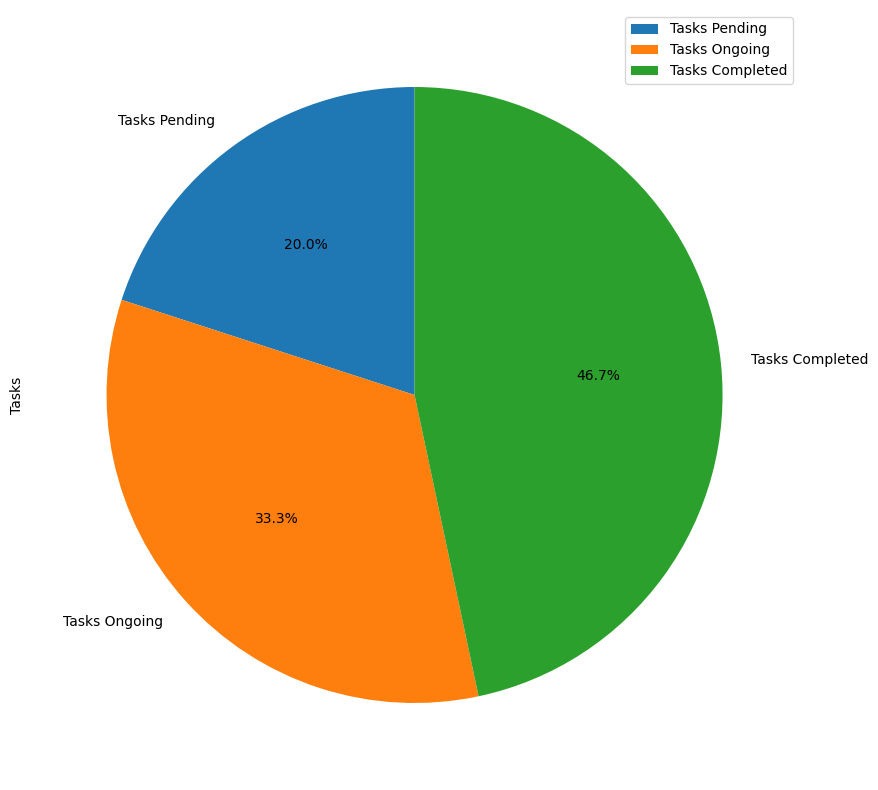

In [9]:
df.plot.pie(y='Tasks',figsize=(10, 10),autopct='%1.1f%%',
            startangle=90);

In [10]:
### Groupby

In [11]:
url_superficie = "https://it.wikipedia.org/wiki/Primi_100_comuni_italiani_per_superficie"

In [12]:
comuni_superficie = pd.read_html(url_superficie,
                                 attrs={"class":"wikitable"},
                                 header=0)

comuni_superficie = comuni_superficie[0]

In [13]:
comuni_superficie = comuni_superficie.rename(columns={'Superficie (km²)': 'Superficie'})

In [14]:
comuni_superficie.head()

,Pos.,Comune,Regione,Provincia,Superficie
0,1,Roma,Lazio,Roma,"1 287,24"
1,2,Ravenna,Emilia-Romagna,Ravenna,65381
2,3,Cerignola,Puglia,Foggia,59392
3,4,Noto,Sicilia,Siracusa,55498
4,5,Sassari,Sardegna,Sassari,54703


In [15]:
#comuni_superficie['Superficie'] = comuni_superficie['Superficie'].str.replace(' ', '').str.replace(',', '.')
comuni_superficie['Superficie'] = comuni_superficie['Superficie'].str.replace(',' , '').str.replace(r'\s', '', regex=True)
comuni_superficie.head()

,Pos.,Comune,Regione,Provincia,Superficie
0,1,Roma,Lazio,Roma,128724
1,2,Ravenna,Emilia-Romagna,Ravenna,65381
2,3,Cerignola,Puglia,Foggia,59392
3,4,Noto,Sicilia,Siracusa,55498
4,5,Sassari,Sardegna,Sassari,54703


In [16]:
#comuni_superficie['Superficie'] = comuni_superficie['Superficie'].astype(float)
#comuni_superficie = pd.to_numeric(comuni_superficie['Superficie Rate']) 
#comuni_superficie['Superficie'] = comuni_superficie['Superficie'].astype(dtype = float, errors = 'coerce')
comuni_superficie['Superficie'] = pd.to_numeric(comuni_superficie['Superficie'], errors = 'coerce')
comuni_superficie # coerce transform not numeric in NaN

,Pos.,Comune,Regione,Provincia,Superficie
0,1,Roma,Lazio,Roma,128724
1,2,Ravenna,Emilia-Romagna,Ravenna,65381
2,3,Cerignola,Puglia,Foggia,59392
3,4,Noto,Sicilia,Siracusa,55498
4,5,Sassari,Sardegna,Sassari,54703
...,...,...,...,...,...
95,96,Dorgali,Sardegna,Nuoro,22653
96,97,Urbino,Marche,Pesaro e Urbino,22649
97,98,Cagli,Marche,Pesaro e Urbino,22646
98,99,Ostuni,Puglia,Brindisi,22556


In [17]:
comuni_superficie.dropna()
comuni_superficie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Pos.        100 non-null    int64 
 1   Comune      100 non-null    object
 2   Regione     100 non-null    object
 3   Provincia   100 non-null    object
 4   Superficie  100 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.0+ KB


In [18]:
comuni_superficie

,Pos.,Comune,Regione,Provincia,Superficie
0,1,Roma,Lazio,Roma,128724
1,2,Ravenna,Emilia-Romagna,Ravenna,65381
2,3,Cerignola,Puglia,Foggia,59392
3,4,Noto,Sicilia,Siracusa,55498
4,5,Sassari,Sardegna,Sassari,54703
...,...,...,...,...,...
95,96,Dorgali,Sardegna,Nuoro,22653
96,97,Urbino,Marche,Pesaro e Urbino,22649
97,98,Cagli,Marche,Pesaro e Urbino,22646
98,99,Ostuni,Puglia,Brindisi,22556


In [19]:
media_sup_per_regione = comuni_superficie.groupby('Regione', as_index=False)['Superficie'].mean()
#comuni_superficie.groupby('Regione').mean()
media_sup_per_regione = media_sup_per_regione.rename(columns={'Superficie': 'Superficie media comuni'})
media_sup_per_regione

,Regione,Superficie media comuni
0,Abruzzo,47391.000000
1,Basilicata,29640.000000
2,Calabria,28937.333333
3,Emilia-Romagna,31149.700000
4,Lazio,56260.500000
5,Liguria,24029.000000
6,Lombardia,22700.500000
7,Marche,24167.666667
8,Puglia,33034.736842
9,Sardegna,29028.111111


In [20]:
#reg = comuni_superficie.groupby('Regione')
#reg.aggregate([np.mean, np.std, pd.Series.count])
reg = comuni_superficie.groupby('Regione')['Superficie'].agg(
    Media='mean',       # Calcola la media
    Deviazione_Standard='std',  # Calcola la deviazione standard
    Conteggio='count'   # Calcola il conteggio
)
reg

,Media,Deviazione_Standard,Conteggio
Regione,,,
Abruzzo,47391.000000,NaN,1
Basilicata,29640.000000,8418.853188,3
Calabria,28937.333333,5408.071221,3
Emilia-Romagna,31149.700000,13146.748504,10
Lazio,56260.500000,48682.994967,4
Liguria,24029.000000,NaN,1
Lombardia,22700.500000,40.305087,2
Marche,24167.666667,2633.006330,3
Puglia,33034.736842,10047.229131,19


In [21]:
comuni_superficie.groupby('Regione')['Superficie'].count()

Regione
Abruzzo                 1
Basilicata              3
Calabria                3
Emilia-Romagna         10
Lazio                   4
Liguria                 1
Lombardia               2
Marche                  3
Puglia                 19
Sardegna                9
Sicilia                19
Toscana                14
Trentino-Alto Adige     2
Umbria                  7
Veneto                  3
Name: Superficie, dtype: int64

In [22]:
comuni_superficie.groupby('Regione')['Superficie'].count().sort_values(ascending=False)

Regione
Puglia                 19
Sicilia                19
Toscana                14
Emilia-Romagna         10
Sardegna                9
Umbria                  7
Lazio                   4
Basilicata              3
Marche                  3
Veneto                  3
Calabria                3
Lombardia               2
Trentino-Alto Adige     2
Liguria                 1
Abruzzo                 1
Name: Superficie, dtype: int64

In [23]:
!pip install jupyter-summarytools -q

In [24]:
from summarytools import dfSummary
dfSummary(comuni_superficie)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Pos.[int64],Mean (sd) : 50.5 (29.0)min < med < max:1.0 < 50.5 < 100.0IQR (CV) : 49.5 (1.7),100 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAcZJREFUeJzt10FOwmAQQOH5GyUgpA0hwgG8AUsO4WE9BCdg4cYVOxLSlFAxGqwnACk16kvet22nM4sXElLTNCH9d9lfHyBd4ua7F1JKg4joXfn9LCI+r5ztOk/dTb276/x70zSHUw/PhppSGkwmk8c8z8dttx6Px9u6rh9Go9FLlmUfvzlP3U29+yfmd7tdmVJ6OhXrd7+ovTzPx4vF4lAUxVubxev1erxare7n8/nzbDYr28x2nafupt7ddb6qqv5yuRxvt9teRFwVakREFEXxNp1OX9ssL8tyEBExHA5bz3adp+6m3v0T8xExOPfQP1NCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCuHmkpeqquq3/fB+v+9HRNR13d9sNne/OU/dTb276/wlfX0BkpY55nO5980AAAAASUVORK5CYII="">",0(0.0%)
2,Comune[object],1. Alghero2. Roma3. Ravenna4. Cerignola5. Bagno di Romagna6. San Vito7. Arzachena8. Reggio Emilia9. Corleone10. Forlì11. other,1 (1.0%)1 (1.0%)1 (1.0%)1 (1.0%)1 (1.0%)1 (1.0%)1 (1.0%)1 (1.0%)1 (1.0%)1 (1.0%)90 (90.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA6RJREFUeJzt3EFqG1kYRtFfwiTRpIQweBlegBfRi+1FaAHehzGuQZRkogwCoYcdO74KyjlzQw0uT1TxPm/O5/NAYXvpB+DvITYyYiMjNjJiIyM2MmIjIzYyYiOzmZndzHyYmW/n8/l04efhit3c3t7+syzLYV3X581m86/geC/bZVkO9/f3syzLYX6ccPAutjMzu93u66UfhOvnBYGM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhsZ2ZOp9PHSz8I12+7ruvz4+PjrOv6PDPfLv1AXC8bBDIb/zKLipONjHUVGesqMtZVZHzUJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2PwQsbghYxr4WQMXsg42cgYvJAxeCFj8ELGR10yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IuBZOxuCFjBcEMn5GyVhXkbGuImNdRcYLAhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxnrKjLWVWRcCydjXUXGyUbG4IWMwQsZgxcyPuqSERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxrVwMgYvZJxsZAxeyBi8kDF4IeOjLhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkbGuImNdRcYGgYx1FRknGxnrKjLWVWSsq8j4qEtGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZ18LJGLyQcbKRMXghY/BCxuCFjI+6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHEtnIzBCxkvCGT8jJKxriJjXUXGuoqMFwQyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIuBZOxrqKjJONjMELGYMXMgYvZHzUJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2PwQsbghYxr4WQMXsj892SD/+PVv4A/By+/+4m4Tm8ZRt0sy3J4eHg47ff7L+/xcFyPl5eXT8fj8fD09PRhZn49tpmZ/X7/5e7u7vNvfzqu0e61f+ijLhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG5mbmR9XRy79IPz53trJzbquz8fj8TBvuDrC3+MtwyjXwvlVr74WbvBCxgsCGbGRERsZsZERGxmxkREbGbGRERuZ73SSt8V+I1ieAAAAAElFTkSuQmCC"">",0(0.0%)
3,Regione[object],1. Puglia2. Sicilia3. Toscana4. Emilia-Romagna5. Sardegna6. Umbria7. Lazio8. Marche9. Veneto10. Basilicata11. other,19 (19.0%)19 (19.0%)14 (14.0%)10 (10.0%)9 (9.0%)7 (7.0%)4 (4.0%)3 (3.0%)3 (3.0%)3 (3.0%)9 (9.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAABARJREFUeJzt3E1qG1kARtGnxoTORMIYvBgvohfbi9BujLEGSchEGWSUWAr1o7ox+JwNlAeXJ6p4n3fn83lA4Z+//QfwcYiNjNjIiI2M2MiIjYzYyIiNjNjI7MYYn8cYn+Lnfj+fz1/jZ/KX3T08PPy33+/vy4eeTqeX3W73v+A+lrv9fn//9PT09XA4fCse+Pr6+u/xeLx/fn7+NMYQ2wdyN8YYh8Ph2+Pj45fwuZ/DZ/FOeEEgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyd2P8vGNWPbB8Fu/L3el0ejkej/cjvGN2Op1exhjfq+fxPtggkNn5l1lUnGxkrKvIWFeRsa4i46MuGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMgYvZFwLJ2PwQmbLk83pxS82G7wYtfC7TQYvRi1csuXgxaiFX/ioS0ZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERmaTwYtRC5dsNngxauF3roWTMXgh4wWBzC1+Rv1cMsnqdZUVFVOtWldZUTHHLdZVVlRM4gWBjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzKp1lRUVc6xeV1lRMZVr4WSsq8isOdmcaMyyePBi6MJciwYvhi4ssWbwYujCLD7qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkVk0eDF0YYnFgxdDF+ZyLZyMwQuZuSeb04zFZg1ejFxYY/LgxciFteYOXoxcWMxHXTJiIyM2MmIjIzYyYiMjNjJiIyM2Mm

In [25]:
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

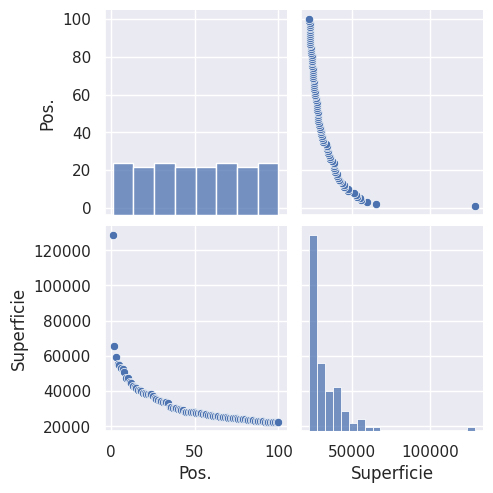

In [26]:
sns.pairplot(comuni_superficie);
#https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn-pairplot


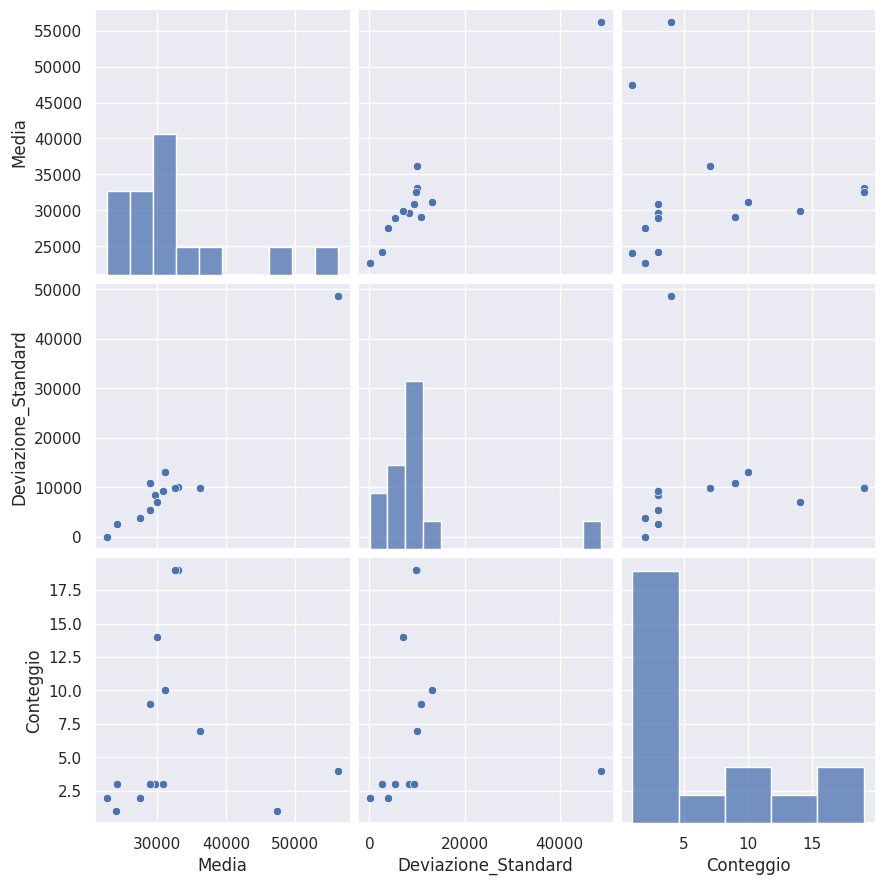

In [27]:
sns.pairplot(reg, height=3, aspect=1);

## PETS

In [28]:
df = pd.DataFrame({
    'name':['john','mary','peter','jeff','bill','lisa','jose'],
    'age':[23,78,22,19,45,33,20],
    'gender':['M','F','M','M','M','F','M'],
    'state':['california','dc','california','dc','california','texas','texas'],
    'num_children':[2,0,0,3,2,1,4],
    'num_pets':[5,1,0,5,2,2,3]
})

df

,name,age,gender,state,num_children,num_pets
0,john,23,M,california,2,5
1,mary,78,F,dc,0,1
2,peter,22,M,california,0,0
3,jeff,19,M,dc,3,5
4,bill,45,M,california,2,2
5,lisa,33,F,texas,1,2
6,jose,20,M,texas,4,3


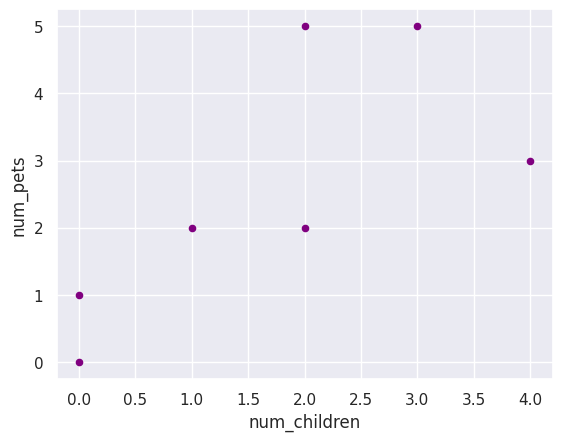

In [29]:
df.plot(kind='scatter',x='num_children',y='num_pets',color='purple');

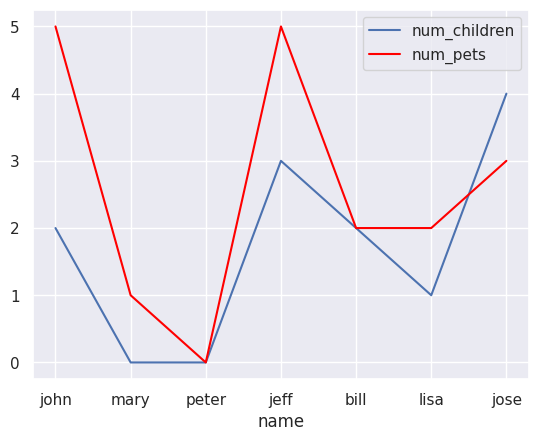

In [30]:
# gca stands for 'get current axis'
ax = plt.gca()
df.plot(kind='line',x='name',y='num_children',ax=ax)
df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax);

#plt.show()

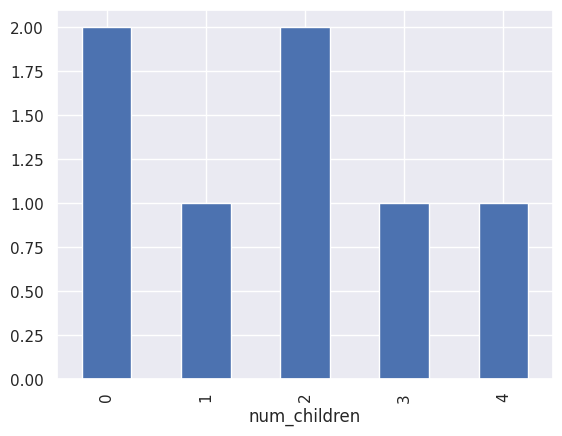

In [31]:
df.groupby('num_children').size().plot(kind='bar');

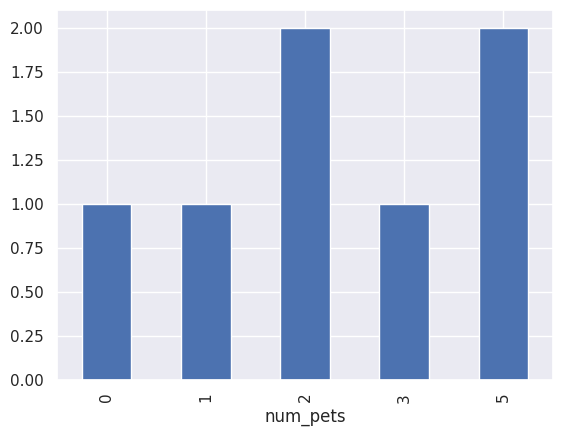

In [32]:
df.groupby('num_pets').size().plot(kind='bar');

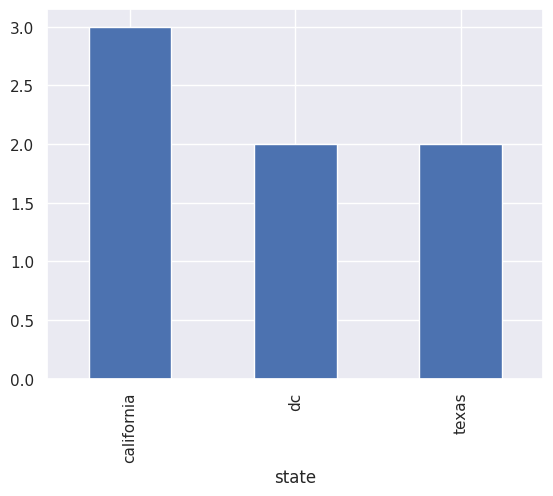

In [33]:
df.groupby('state').size().plot(kind='bar');

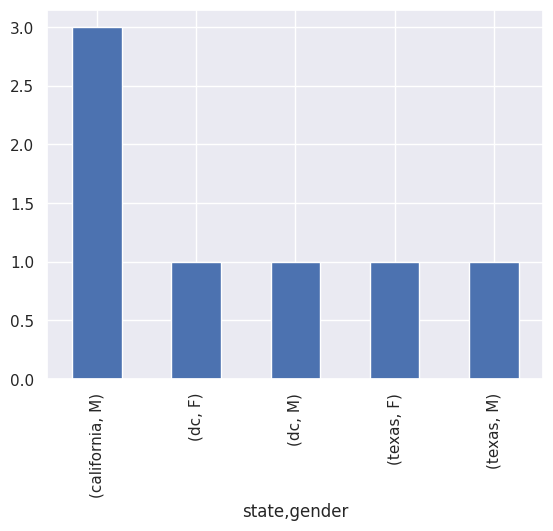

In [34]:
df.groupby(['state','gender']).size().plot(kind='bar');

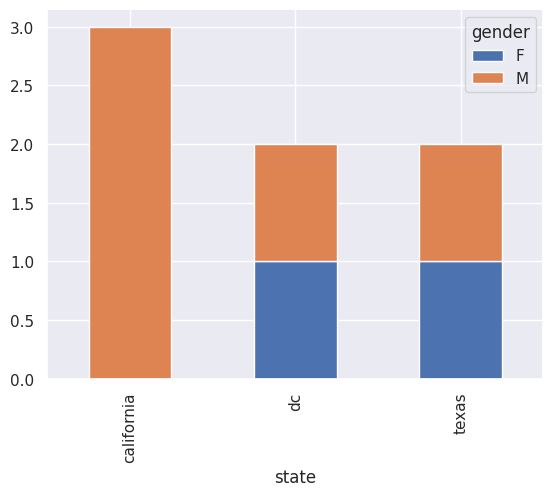

In [35]:
df.groupby(['state','gender']).size().unstack().plot(kind='bar',stacked=True);

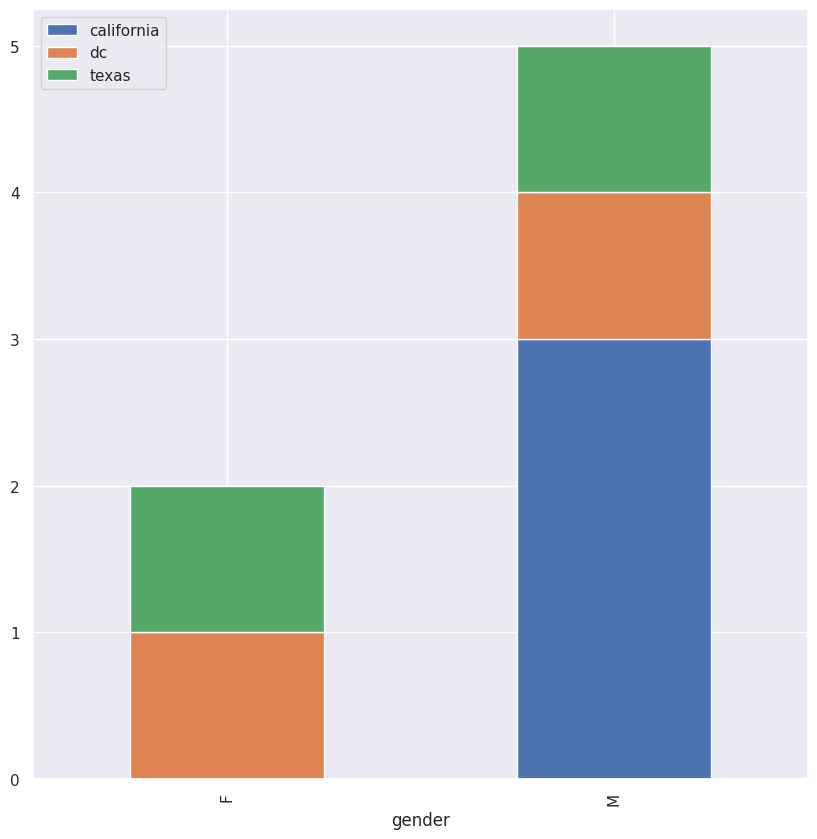

In [36]:
df.groupby(['gender','state']).size().unstack().plot(kind='bar',
                                                     stacked=True,
                                                     figsize=(10, 10))
plt.legend(loc='upper left');